<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Lab 01 - Data visualization with Python @ FIT-HCMUS, VNU-HCM 📌
</div>

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 02 - Data exploration 📌
</div>

# Import các thư viện cần thiết

In [202]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Khám phá dữ liệu

### Đọc dữ liệu từ file

In [179]:
raw_df = None
raw_df = pd.read_csv('../data/raw/used_cars_data.csv')

In [180]:
raw_df

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN


### Xóa cột thứ tự không cần thiết

In [181]:
raw_df = raw_df.drop('S.No.', axis=1)

### Dữ liệu có bao nhiêu cột và bao nhiêu dòng?

In [182]:
shape = raw_df.shape
shape

(7253, 13)

### Ý nghĩa của mỗi dòng là gì?

Mỗi dòng chứa các thông tin về tên, nơi sản xuất, năm sản xuất, và các thuộc tính khác của mỗi chiếc xe ô tô.

### Dữ liệu có dòng nào bị trùng lặp không?

In [183]:
num_duplicated_rows = None
num_duplicated_rows = raw_df.duplicated().sum()
#TEST
if num_duplicated_rows == 0:
    print(f"Dữ liệu không có dòng nào trùng lặp!")
else:
    print(f"Dữ liệu có {num_duplicated_rows} dòng bị trùng lặp "+ ". Vui lòng xóa các dòng đó!")

Dữ liệu có 1 dòng bị trùng lặp . Vui lòng xóa các dòng đó!


#### Xóa các dòng bị trùng lắp dữ liệu

In [184]:

raw_df = raw_df.drop_duplicates()

#### Kiểm tra lại

In [185]:
#TEST
num_duplicated_rows = raw_df.duplicated().sum()
if num_duplicated_rows == 0:
    print(f"Dữ liệu không có dòng nào trùng lặp!")
else:
    print(f"Dữ liệu có {num_duplicated_rows} dòng bị trùng lặp "+ ". Vui lòng xóa các dòng đó!")

Dữ liệu không có dòng nào trùng lặp!


### Ý nghĩa của mỗi cột là gì?

- Name: Tên của mỗi loại ô tô.
- Location: Nơi bán của mỗi loại ô tô.
- Year: Năm sản xuất của mỗi ô tô.
- Kilometers_Driven: quãng đường(số km) mà xe đã đi 
- Fuel_Type: Loại nhiên liệu xe sử dụng.
- Transmission: Loại hộp số của xe.
- Owner_Type: Người dùng đời thứ mấy của xe.
- Mileage: Quãng đường mà xe đi được trong một đơn vị nhiên liệu như kmpl(kilometers  per liter) hoặc km/kg.
- Engine: Dung tích xi-lanh của động cơ xe sử dụng đơn vị là cc.
- Power: Công xuất tối đa của xe sử dụng đơn vị là bhp (brake horsepower - đơn vị đo lường để mô tả lượng điện năng mà động cơ ô tô hoặc động cơ điện tạo ra để di chuyển nó).
- Seats: Số chỗ ngồi của xe.
- New_Price: Giá bán mới nhất của xe được sử dụng đơn vị Lakh (là một loại ngôn ngữ chỉ số lượng lớn trong ngôn ngữ Ấn Độ, 1 Lakh = 100000).
- Price: Giá bán trước đây của xe được sử dụng đơn vị Lakh.

### Mỗi cột có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu không phù hợp cho việc xử lí dữ liệu không?

In [186]:

raw_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7252 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7252 non-null   object 
 1   Location           7252 non-null   object 
 2   Year               7252 non-null   int64  
 3   Kilometers_Driven  7252 non-null   int64  
 4   Fuel_Type          7252 non-null   object 
 5   Transmission       7252 non-null   object 
 6   Owner_Type         7252 non-null   object 
 7   Mileage            7250 non-null   object 
 8   Engine             7206 non-null   object 
 9   Power              7206 non-null   object 
 10  Seats              7199 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 793.2+ KB


Ở cột Engine, Power và New_Price chủ yếu là kiểu float nhưng do có thêm kí tự đơn vị phía sau nên đang bị thuộc về loại categorical.

### Xử lý datatype cho 3 cột Engine, Power và New_Price

In [187]:
raw_df['Engine'] = raw_df['Engine'].str.replace(' CC', '')
raw_df['Power'] = raw_df['Power'].str.replace(' bhp', '')
raw_df['New_Price'] = raw_df['New_Price'].str.replace(' Lakh', '')


In [188]:
# Mileage = ?
raw_df['Engine'] = pd.to_numeric(raw_df['Engine'], errors='coerce')
raw_df['Power'] = pd.to_numeric(raw_df['Power'], errors='coerce')
raw_df['New_Price'] = pd.to_numeric(raw_df['New_Price'], errors='coerce')

### Xử lý cột Mileage
Vì ở cột này có loại đơn vị khác nhau, nên chúng ta sẽ chuyển đổi đơn vị km/kg sang kmpl

In [189]:
Correct_Mileage= []
for i in raw_df.Mileage:
    if str(i).endswith('km/kg'):
        i = i[:-6]
        i = float(i)*1.40
        Correct_Mileage.append(float(i))
    elif str(i).endswith('kmpl'):
        i = i[:-6]
        #print(i)
        Correct_Mileage.append(float(i))
    else:
        Correct_Mileage.append(float(i))
raw_df['Mileage']=Correct_Mileage
raw_df['Mileage'] = pd.to_numeric(raw_df['Mileage'], errors='coerce')


### Giá trị của các cột có kiểu numeric phân bố như thế nào?
- Phần trăm các giá trị bị thiếu là bao nhiêu?
- Giá trị lớn nhất? Giá trị nhỏ nhất? Có gì bất thường không?

Đối với các cột có kiểu numeric, chúng ta sẽ tính:
- Phần trăm (từ 0 tới 100) của giá trị bị thiếu
- Giá trị nhỏ nhất
- Tứ phân vị 25
- Tứ phân vị 50
- Tứ phân vị 75
- Giá trị lớn nhất

Lưu kết quả vào DataFrame `num_col_info_df`, trong đó:
- Tên của các cột là tên của các cột có kiểu numeric trong `df`
- Tên của các dòng: "missing_ratio", "min", "lower_quartile", "median", "upper_quartile", "max"

In [197]:
num_col_info_df = None

num_col_info_df = raw_df.select_dtypes(include=np.number).copy()

def missing_ratio(column):
    return ((column.isnull().sum() / column.shape[0]) * 100).round(1)

def lower_quartile(column):
    return (column.quantile(0.25)).round(1)

def median(column):
    return (column.median())

def upper_quartile(column):
    return (column.quantile(0.75)).round(1)

# Làm tròn giá trị đến 1 chữ số thập phân
num_col_info_df = num_col_info_df.round(1)

num_col_info_df = num_col_info_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])

In [198]:
num_col_info_df

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1996.0,171.0,0.0,72.0,34.2,0.0,0.4
lower_quartile,2011.0,34000.0,15.0,1198.0,77.0,5.0,3.5
median,2014.0,53429.0,18.0,1493.0,94.0,5.0,5.6
upper_quartile,2016.0,73000.0,21.0,1968.0,138.0,5.0,9.6
max,2019.0,6500000.0,47.0,5998.0,616.0,10.0,160.0


#### Có điều bất thường là: 
- New_Price có tỉ lệ mất mát rất cao lên đến 86.4%

=> Vậy chúng ta xử lý bằng cách xóa hoàn toàn cột New_Price.

#### Xóa cột có tỉ lệ giá trị bị thiếu lớn hơn 65%

In [192]:
def drop_missing_features(df: pd.DataFrame, missing_lst: dict = dict(num_col_info_df.iloc[0]), threshold: float =75.0) -> pd.DataFrame:
    for col, missing_rate in missing_lst.items():
        if missing_rate > threshold:
            del df[col]
    return df

In [193]:
raw_df = drop_missing_features(raw_df)

### Xử lý những dòng bị mất giá trị bằng cách tìm các dòng khác có cùng tên xe và thay thế giá trị của dòng khác vào dòng bị mất

In [194]:

numeric_col_process = ['Mileage', 'Engine', 'Power', 'Seats', 'Price']

In [195]:
for col in numeric_col_process:
    rows_with_nan = raw_df[raw_df[col].isna()]

# Duyệt qua từng dòng có NaN trong col
for index, row in rows_with_nan.iterrows():
    # Tìm dòng có 'Name' trùng với dòng hiện tại
    matched_rows = raw_df[(raw_df['Name'] == row['Name']) & (~raw_df[col].isna())]
    if not matched_rows.empty:
        # Nếu tìm thấy ít nhất một dòng trùng khớp
        matched_row = matched_rows.iloc[0]
        # Thay thế giá trị NaN trong col bằng giá trị tương ứng trong dòng trùng khớp
        raw_df.at[index, col] = matched_row[col]

#### Các dòng còn lại có thể sẽ không có giá nên nhóm sẽ thay bằng median để ít làm ảnh hưởng đến dữ liệu nhất có thể

In [196]:
for col in numeric_col_process:
    raw_df[col] = raw_df[col].fillna(raw_df[col].median())


### Giá trị của các cột có kiểu categorical phân bố như thế nào?
- Phần trăm giá trị bị thiếu là bao nhiêu?
- Có bao nhiêu giá trị phân biệt? Hiển thị một vài giá trị
- Có gì bất thường không?

Đối với các cột có kiểu categorical, chúng ta sẽ tính:
- Phần trăm (từ 0 tới 100) của giá trị bị thiếu
- Số lượng giá trị (giá trị phân biệt, không xét các giá trị bị thiếu)
Lưu kết quả vào DataFrame num_col_info_df, trong đó:
- Tên của các cột là tên của các cột có kiểu không phải numeric trong `df`
- Tên của các dòng: "missing_ratio", "num_values"

In [199]:
cat_col_info_df = raw_df.select_dtypes(exclude=[np.number])

def missing_ratio(column):
    return ((column.isnull().sum() / column.shape[0]) * 100).round(1)

# Hàm tính số lượng giá trị
def num_values(column):
    return column.nunique()

# Hàm tính tỷ lệ của từng giá trị
def value_ratios(column):
    value_counts = column.value_counts() #Đếm số lượng của mỗi loại value trong 1 cột
    non_missing_count = value_counts.sum() #Tổng số lượng của tất cả value trong 1 cột
    ratios = (value_counts / non_missing_count * 100).round(1) #Lưu tỉ lệ vào Series
    ratios_dict = ratios.to_dict()
    sorted_ratios_dict = dict(sorted(ratios_dict.items(), key=lambda item: item[1], reverse=True))
    return sorted_ratios_dict

cat_col_info_df = cat_col_info_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

,Name,Location,Fuel_Type,Transmission,Owner_Type
missing_ratio,0.0,0.0,0.0,0.0,0.0
num_values,2041,11,5,2,4
value_ratios,"{'Mahindra XUV500 W8 2WD': 0.8, 'Maruti Swift ...","{'Mumbai': 13.1, 'Hyderabad': 12.1, 'Coimbator...","{'Diesel': 53.1, 'Petrol': 45.8, 'CNG': 0.9, '...","{'Manual': 71.7, 'Automatic': 28.3}","{'First': 82.1, 'Second': 15.9, 'Third': 1.9, ..."


### Lưu dữ liệu đã xử lí

In [200]:
raw_df.to_csv("../data/processed/used_cars_data_processed.csv" , index=False)

# Trực quan hóa đơn giản

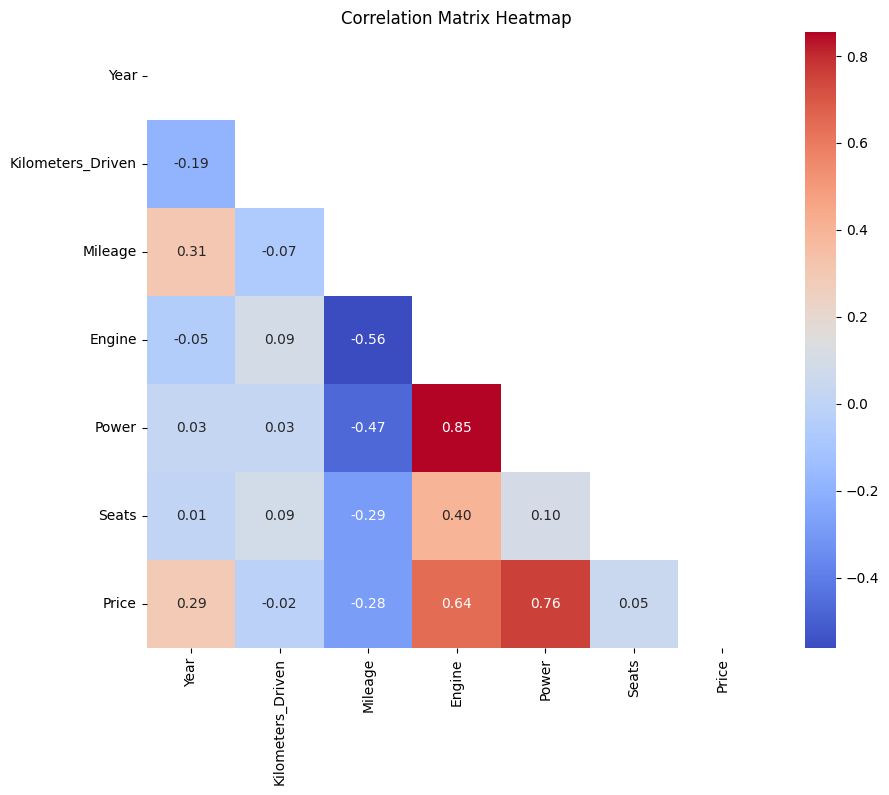

In [206]:
# Lọc các cột numeric
numeric_columns = raw_df.select_dtypes(include=['int64', 'float64'])

# Tính ma trận tương quan
corr_matrix = numeric_columns.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask,annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix Heatmap')
plt.show()